For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



1. Has the network latency gone up since we switched internet service providers?


- Null Hypothesis: There is no difference in network latency since switching providers.
- Alt Hypothesis: The networklatency has gone up since we switched internet service providers.

In [ ]:
- True Pos:
We correctely fail to reject that there is no difference in network latency since switching providers. 

- True Neg:
We correctely reject that that there is no difference in network latency since switching providers.. 

- Type 1: 
We incorrecly say that latency since switching when there is. 
- Type II:
We incorrectly say that the redesign had no effect when it did. 

2. Is the website redesign any good?

- Null Hypothesis: The website redesign had no effect. 

- Alt Hypothesis: The website redesign had a positve effect.

- True Pos:
We correctely fail to reject that the redesign had no effect. 

- True Neg:
We correctely reject that the redesign had no effect. 

- Type 1: 
We incorrecly say that that the redesin had an effect when it did not. 

- Type II:
We incorrectly say that the redesign had no effect when it did. 

3. Is our television ad driving more sales?

In [18]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from env import host, user, password

4. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [23]:
Office1_mean = 90
Office1_std_dev = 15
n1 = 40

Office2_mean = 100
Office2_std_dev = 20
n2 = 50

a = .05

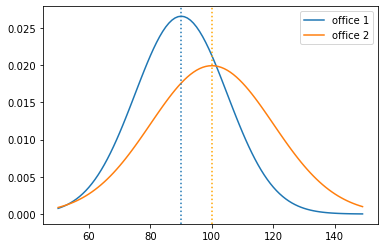

In [88]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()


In [28]:
t, p = stats.ttest_ind_from_stats(90,15,40, 100,20,50, equal_var=False)
t,p,a

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [93]:
print(f'''
Because the p-value ({p}) is less than alpha value ({a}),we reject the null hypothesis''')


Because the p-value (0.7635358418225436) is less than alpha value (0.5),we reject the null hypothesis


5. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


- Are compact cars more fuel-efficient than the average car?


- Do manual cars get better gas mileage than automatic cars?

In [19]:
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [20]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [87]:
mpg['fuel_efficiency'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

In [34]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [35]:
fuel_efficiency08 = mpg[mpg.year == 2008].fuel_efficiency

In [37]:
fuel_efficiency99 = mpg[mpg.year == 1999].fuel_efficiency

<AxesSubplot:>

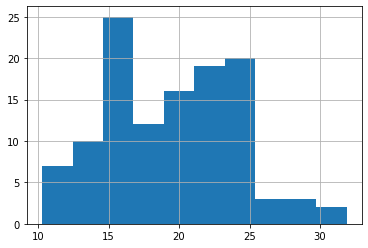

In [99]:
fuel_efficiency08.hist()

<AxesSubplot:>

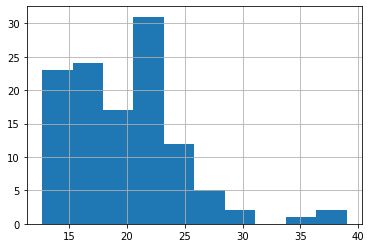

In [100]:
fuel_efficiency99.hist()

In [94]:
fuel_efficiency08.var(), fuel_efficiency99.var()

(22.550836772260343, 25.850396545865912)

In [118]:
a = 0.05

In [119]:
t, p = stats.ttest_ind(fuel_efficiency08, fuel_efficiency99, equal_var=False)
t, p, a

(-0.3011962975077886, 0.7635358418225436, 0.05)

In [122]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [121]:
fuel_efficiency08.mean(), fuel_efficiency99.mean()
# almpst no difference in means

(19.488662986569054, 19.68238764869729)

- Are compact cars more fuel-efficient than the average car?

In [53]:
compact_fuel_efficiency = mpg[mpg['class'] == 'compact'].fuel_efficiency
avg_car_fuel_efficiency = mpg.fuel_efficiency.mean()

In [101]:
t,p = stats.ttest_1samp(compact_fuel_efficiency, avg_car_fuel_efficiency)
t, p/2, a

(7.512360093161361, 7.808833174403665e-10, 0.5)

In [103]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


- Do manual cars get better gas mileage than automatic cars?

In [114]:
manual_fuel_efficiency = mpg[mpg.trans.str.contains('manual')].fuel_efficiency


auto_fuel_efficiency = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

a
a = 0.05


In [115]:
manual_fuel_efficiency.var(), auto_fuel_efficiency.var()

(25.665633639828275, 20.428279095002054)

In [116]:

t, p = stats.ttest_ind(manual_fuel_efficiency, auto_fuel_efficiency, equal_var = False)
t, p/2, a


(4.47444321386703, 7.99035135103976e-06, 0.05)

In [117]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")



We reject the null hypothesis
